In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [61]:
# load game event
game_event = pd.read_csv("event_analysis.csv")
game_event

,gameID,playID,playPerGame,eventTimeStamp,eventCode
0,1,23916,3,38518,1
1,1,23916,3,38918,4
2,1,23916,3,39018,5
3,1,21510,12,246618,1
4,1,21510,12,247068,4
...,...,...,...,...,...
47194,97,23751,249,8746672,16
47195,97,23751,249,8747222,16
47196,97,23751,249,8747672,16
47197,97,23751,249,8748522,2


In [62]:
# Load ball position
ball_pos = pd.read_csv("ball_pos_analysis.csv")
ball_pos

,playID,playPerGame,gameID,ballPositionX,ballPositionY,ballPositionZ,ballTimeStamp
0,23916,3,1,-0.335508,54.21180,5.794710,38518
1,23916,3,1,-0.227452,47.68860,5.456370,38568
2,23916,3,1,-0.135159,41.22240,5.077170,38618
3,23916,3,1,-0.058631,34.81290,4.657110,38668
4,23916,3,1,0.002134,28.46016,4.196160,38718
...,...,...,...,...,...,...,...
542335,23751,249,97,-15.681480,262.10910,0.071624,8748322
542336,23751,249,97,-15.805920,263.79000,-0.053669,8748372
542337,23751,249,97,-15.944550,265.44180,-0.204321,8748422
542338,23751,249,97,-16.097310,267.06420,-0.380331,8748472


In [63]:
# Load player position
player_pos = pd.read_csv("player_pos_analysis.csv")
player_pos.head(30)

,playID,playPerGame,gameID,playerNum,posCode,posName,playerTimeStamp,fieldX,fieldY
0,14335,1,1,1628,4,Second Baseman,116558,-49,144
1,14335,1,1,2590,6,ShortStop,713689,127,267
2,14335,1,1,1643,8,Center Field,3088539,6,68
3,14335,1,1,2713,1,Pitcher,3857839,41,109
4,14335,1,1,1258,5,Third Baseman,4667839,1,-6
5,14335,1,1,0,11,Runner on First Base,4677306,119,249
6,14335,1,1,0,12,Runner on Second Base,4791616,-135,257
7,14335,1,1,2222,2,Catcher,5383077,-23,134
8,14335,1,1,2737,9,Right Field,6229272,1,-5
9,14335,1,1,1784,3,First Baseman,6229372,1,-5


In [40]:
player_pos[player_pos["playID"] == 15421]

,playID,playPerGame,gameID,playerNum,posCode,posName,playerTimeStamp,fieldX,fieldY
1613,15421,126,1,0,13,Runner on Third Base,190615,11,328
1614,15421,126,1,9325,4,Second Baseman,728258,100,271
1615,15421,126,1,8020,3,First Baseman,1454589,0,57
1616,15421,126,1,3542,7,Left Field,1594689,28,148
1617,15421,126,1,7870,8,Center Field,2036239,60,63
1618,15421,126,1,8557,2,Catcher,2959989,-115,289
1619,15421,126,1,0,12,Runner on Second Base,3317039,-132,268
1620,15421,126,1,6697,6,ShortStop,3600339,0,-5
1621,15421,126,1,1258,10,Batter,5625672,-127,269
1622,15421,126,1,4704,5,Third Baseman,6749766,-47,141


In [41]:
# mapping for game_event
mapping = game_event.set_index(["playID", "eventTimeStamp"])['eventCode'].to_dict()
ball_pos['eventCode'] = ball_pos.apply(lambda row: mapping.get((row['playID'], row['ballTimeStamp']), None), axis=1)

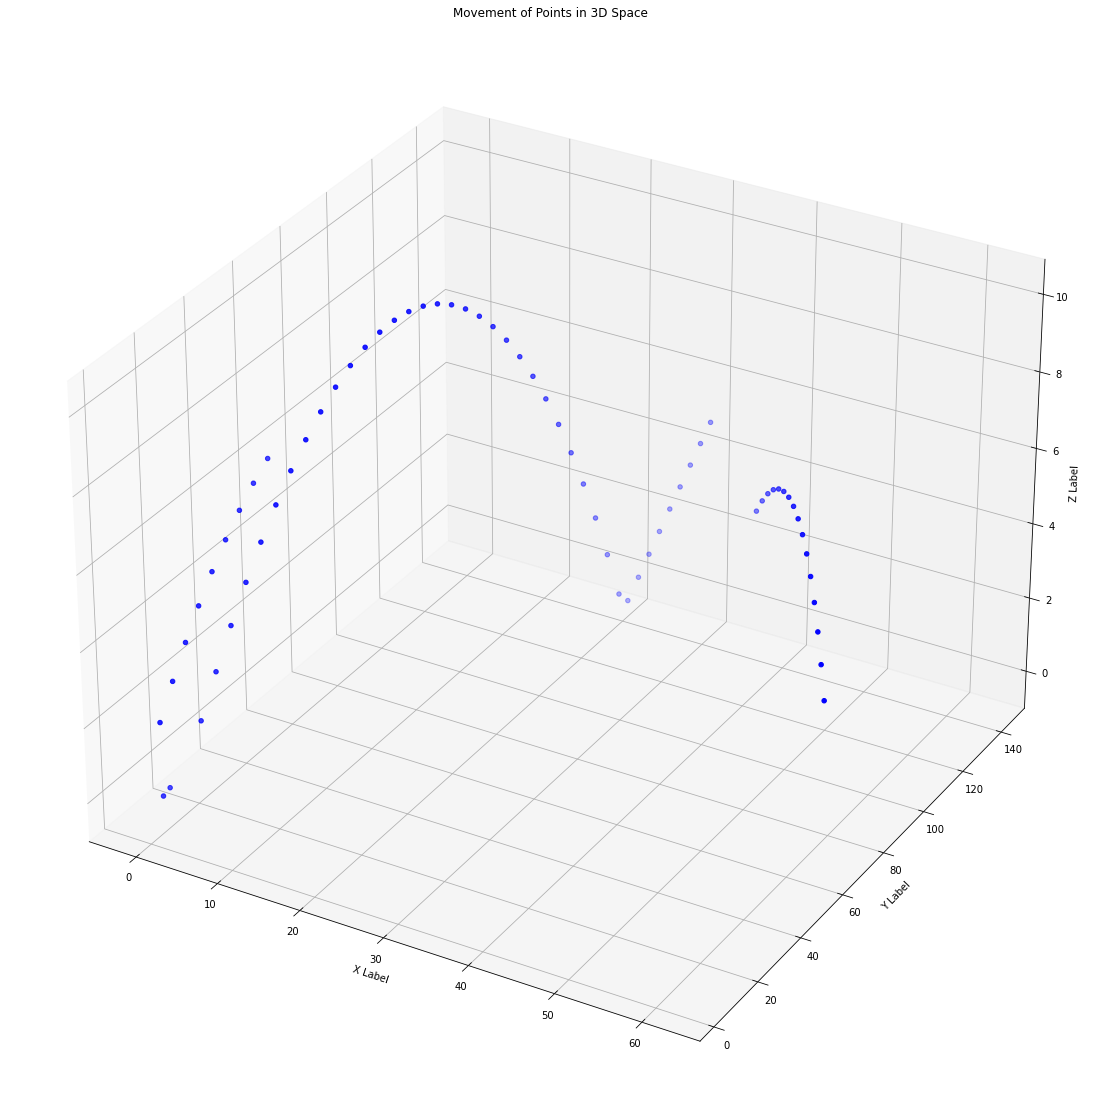

In [42]:
# ploting out the route of the flying ball of a specific play for visualization

x = ball_pos[ball_pos["playID"] == 6]['ballPositionX']
y = ball_pos[ball_pos["playID"] == 6]['ballPositionY']
z = ball_pos[ball_pos["playID"] == 6]['ballPositionZ']

# Create a figure and a 3D axes object
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x, y, z, c='b', marker='o')

# Set labels for each axis
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Set title
ax.set_title('Movement of Points in 3D Space')

# Show the plot
plt.show()

In [43]:
# Calculate travel distance
def travel_distance(x1, y1, z1, x2, y2, z2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

# Dictionary to store results for each playID
results = {}

# The start of the ball pos would be when the eventCode = 4,
# and the end of the ball pos would be when the eventCode = 2 or 11
for playID, play_data in ball_pos.groupby('playID'):
    event_codes = play_data['eventCode'].values
    
    start_idx = np.where(event_codes == 4)[0][0] if 4 in event_codes else None
    end_idx = next((i for i, code in enumerate(event_codes) if code in [2, 11]), None)
    
    if start_idx is not None and end_idx is not None:
        positions = play_data[['ballPositionX', 'ballPositionY', 'ballPositionZ']].values
        timestamps = play_data['ballTimeStamp'].values / 1000  # Convert to seconds
        
        positions = positions[start_idx:end_idx+1]
        timestamps = timestamps[start_idx:end_idx+1]
        
        speeds = []
        for i in range(1, len(positions)):
            distance = travel_distance(*positions[i-1], *positions[i])
            time_interval = timestamps[i] - timestamps[i-1]
            
            if time_interval > 0:  # Avoid division by zero
                speed = distance / time_interval
                speeds.append(speed)
        
        total_distance = sum(travel_distance(*pos1, *pos2) for pos1, pos2 in zip(positions[:-1], positions[1:]))
        
        results[playID] = {
            'Total Distance': total_distance,
            'Average Ball Speed': np.mean(speeds) if speeds else 0  # Set to 0 if no speeds available
        }
    else:
        results[playID] = {
            'Total Distance': 0,
            'Average Ball Speed': 0
        }

# Calculate straight line distance
dist = {}
for playid in ball_pos["playID"].unique():
    play = ball_pos[ball_pos["playID"] == playid]
    startPoint = play[play["eventCode"] == 4]
    
    if not play[play["eventCode"] == 11].empty:
        endPoint = play[play["eventCode"] == 11].iloc[0]
    elif not play[play["eventCode"] == 2].empty:
        endPoint = play[play["eventCode"] == 2].iloc[0]
    else:
        dist[playid] = 0
        continue  # No valid end point, skip this playID
    
    if not startPoint.empty:
        startPoint = startPoint.iloc[0]
        x1 = startPoint["ballPositionX"]
        y1 = startPoint["ballPositionY"]
        z1 = startPoint["ballPositionZ"]
        x2 = endPoint["ballPositionX"]
        y2 = endPoint["ballPositionY"]
        z2 = endPoint["ballPositionZ"]
        distance = travel_distance(x1, y1, z1, x2, y2, z2)
        dist[playid] = distance

# Combine the two dictionaries into a single DataFrame
output_data = []
for playid in ball_pos["playID"].unique():
    total_distance = results.get(playid, {}).get('Total Distance', 0)
    straight_line_distance = dist.get(playid, 0)
    average_speed = results.get(playid, {}).get('Average Ball Speed', 0)
    
    # Calculate route efficiency
    route_efficiency = straight_line_distance / total_distance if total_distance != 0 else 0
    
    output_data.append({
        'playID': playid,
        'totalDistance': total_distance,
        'averageBallSpeed': average_speed,
        'straightLineDistance': straight_line_distance,
        'routeEfficiency': route_efficiency
    })

output_df = pd.DataFrame(output_data)


In [44]:
ball_pos[ball_pos["playID"] == 6079]

,playID,playPerGame,gameID,ballPositionX,ballPositionY,ballPositionZ,ballTimeStamp,eventCode
1844,6079,64,1,-1.207905,53.363400,5.851110,1954268,1.0
1845,6079,64,1,-0.923502,46.616100,5.479170,1954318,NaN
1846,6079,64,1,-0.662655,39.945900,5.062620,1954368,NaN
1847,6079,64,1,-0.425355,33.353100,4.601460,1954418,NaN
1848,6079,64,1,-0.211605,26.837340,4.095720,1954468,NaN
1849,6079,64,1,-0.021406,20.398800,3.545370,1954518,NaN
1850,6079,64,1,0.145243,14.037390,2.950416,1954568,NaN
1851,6079,64,1,0.288341,7.753200,2.310864,1954618,NaN
1852,6079,64,1,0.407889,1.546173,1.626714,1954668,4.0


In [45]:
output_df

,playID,totalDistance,averageBallSpeed,straightLineDistance,routeEfficiency
0,23916,0.000000,0.000000,0.000000,0.000000
1,21510,141.866223,91.526596,141.395469,0.996682
2,7027,285.113437,80.313644,265.587108,0.931514
3,20035,0.000000,0.000000,0.000000,0.000000
4,9072,468.272007,92.727130,418.643945,0.894019
...,...,...,...,...,...
9054,25382,0.000000,0.000000,0.000000,0.000000
9055,20611,0.000000,0.000000,0.000000,0.000000
9056,25637,267.424432,64.439622,259.967328,0.972115
9057,11153,143.937992,99.267581,143.601922,0.997665


In [46]:
output_df.to_csv("ballAnalysis.csv", index=True)

In [47]:
len(ball_pos["playID"].unique())

9059

In [48]:
ball_pos[ball_pos["playID"] == 6]

,playID,playPerGame,gameID,ballPositionX,ballPositionY,ballPositionZ,ballTimeStamp,eventCode
412665,6,164,75,-0.378564,53.92590,6.39942,5856540,1.0
412666,6,164,75,-0.309402,47.51700,6.06864,5856590,NaN
412667,6,164,75,-0.228994,41.15100,5.67723,5856640,NaN
412668,6,164,75,-0.137340,34.82760,5.22513,5856690,NaN
412669,6,164,75,-0.034442,28.54731,4.71237,5856740,NaN
...,...,...,...,...,...,...,...,...
412727,6,164,75,56.458200,83.58480,5.41527,5860790,NaN
412728,6,164,75,57.869400,79.69890,5.02953,5860840,NaN
412729,6,164,75,59.256000,75.84030,4.55556,5860890,NaN
412730,6,164,75,60.618000,72.00870,3.99330,5860940,NaN


In [49]:
ball_pos.to_csv("ball_pos_event.csv",index=False)

**from Luke**

In [50]:
# Build a new dataframe with every row contain the playID playPergame and gameID, also including a new feature
# "result" which have value 1, 2, 3 means batter run to first, second, third base.

# Used to save value
new_data = []

# find all the game id
unique_games = player_pos['gameID'].unique()

for game_id in unique_games:
    game_data = player_pos[player_pos['gameID'] == game_id]
    
    # Now check details about each single game
    for i in range(len(game_data)):
        row = game_data.iloc[i]
        
        if row['posCode'] == 10:
            player_num = row['playerNum']
            play_per_game = row['playPerGame']
            next_play_per_game = play_per_game + 1
            
            next_row = game_data[(game_data['playPerGame'] == next_play_per_game) & 
                                 (game_data['playerNum'] == player_num) & 
                                 (game_data['posCode'].isin([11, 12, 13]))]
            
            if not next_row.empty:
                result = next_row['posCode'].values[0] - 10
                new_data.append((row['playID'], play_per_game, game_id, result))

# build new dataframe
new_columns = ['playID', 'playPerGame', 'gameID', 'result']
new_df = pd.DataFrame(new_data, columns=new_columns)


In [51]:
# left join the new_df and the output_df on playID
output_df = output_df.merge(new_df[['playID', 'result']], on='playID', how='left')

In [52]:
# Fill all the NA values in the result column. 
# If it's 0, then the player didn't get on the base in that play.
output_df['result'].fillna(0, inplace=True)

In [53]:
# show the new output_df
output_df

,playID,totalDistance,averageBallSpeed,straightLineDistance,routeEfficiency,result
0,23916,0.000000,0.000000,0.000000,0.000000,0.0
1,21510,141.866223,91.526596,141.395469,0.996682,0.0
2,7027,285.113437,80.313644,265.587108,0.931514,1.0
3,20035,0.000000,0.000000,0.000000,0.000000,0.0
4,9072,468.272007,92.727130,418.643945,0.894019,0.0
...,...,...,...,...,...,...
9054,25382,0.000000,0.000000,0.000000,0.000000,1.0
9055,20611,0.000000,0.000000,0.000000,0.000000,2.0
9056,25637,267.424432,64.439622,259.967328,0.972115,0.0
9057,11153,143.937992,99.267581,143.601922,0.997665,0.0


In [54]:
# create a df called filtered_output that exclude any situation of batter missing the ball
filtered_output = output_df[output_df["straightLineDistance"] != 0]

In [55]:
# show the filtered_output
filtered_output

,playID,totalDistance,averageBallSpeed,straightLineDistance,routeEfficiency,result
1,21510,141.866223,91.526596,141.395469,0.996682,0.0
2,7027,285.113437,80.313644,265.587108,0.931514,1.0
4,9072,468.272007,92.727130,418.643945,0.894019,0.0
6,5758,375.650104,57.792324,168.037412,0.447324,0.0
7,13615,313.100141,49.698435,301.501797,0.962956,0.0
...,...,...,...,...,...,...
9050,10885,114.513844,76.342563,113.786799,0.993651,0.0
9053,21171,358.630350,50.158091,285.260731,0.795417,0.0
9056,25637,267.424432,64.439622,259.967328,0.972115,0.0
9057,11153,143.937992,99.267581,143.601922,0.997665,0.0


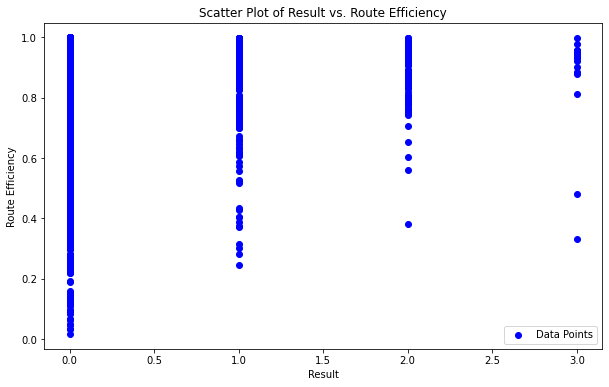

In [56]:
# ploting out the scatter plot for result and route efficiency
plt.figure(figsize=(10, 6))
# Assuming filtered_output is your DataFrame
plt.scatter(x=filtered_output["result"], y=filtered_output["routeEfficiency"], color='blue', label='Data Points')
# Add labels and title
plt.xlabel('Result')
plt.ylabel('Route Efficiency')
plt.title('Scatter Plot of Result vs. Route Efficiency')

# Add legend
plt.legend()

# Show the plot
plt.show()

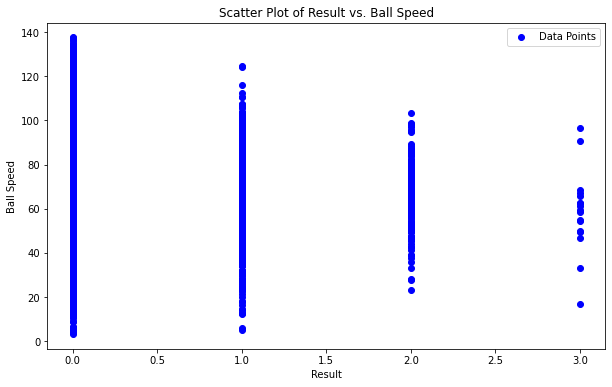

In [57]:
# ploting out the scatter plot for result and route efficiency
plt.figure(figsize=(10, 6))
# Assuming filtered_output is your DataFrame
plt.scatter(x=filtered_output["result"], y=filtered_output["averageBallSpeed"], color='blue', label='Data Points')
# Add labels and title
plt.xlabel('Result')
plt.ylabel('Ball Speed')
plt.title('Scatter Plot of Result vs. Ball Speed')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [58]:
# create a new dummy variable onBase that is 1 if the result is at least 1, and 0 otherwise
# If it's 1, it means the batter got onbase successfully, and 0 if failed.
filtered_output['onBase'] = np.where(filtered_output["result"] > 0, 1, 0)

/var/folders/s4/ym_rw0yn2fnbf226cdtlr2040000gn/T/ipykernel_1858/214010892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_output['onBase'] = np.where(filtered_output["result"] > 0, 1, 0)


In [59]:
# logistic regression for finding the relationship between the possibility of batter getting on base and the ball's route efficiency
m = smf.logit("onBase ~ routeEfficiency", data=filtered_output).fit()
m.summary()

Optimization terminated successfully.
         Current function value: 0.461725
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 onBase   No. Observations:                 4488
Model:                          Logit   Df Residuals:                     4486
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.01280
Time:                        21:49:47   Log-Likelihood:                -2072.2
converged:                       True   LL-Null:                       -2099.1
Covariance Type:            nonrobust   LLR p-value:                 2.301e-13
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.5186      0.310    -11.339      0.000      -4.127      -2.910
routeEfficiency     2.1927      0.335      6.552      0.000       1.537       2.849
===================================================================================
"""

* Accourding to the results above, there is a positive relationship between the possibility of batter getting on base and the ball's route efficiency
* The batter is more likely to get on base, as the route efficiency increases.

In [60]:
# logistic regression model for finding how route efficiency and average ball speed can affect 
# the possibility of batter getting on base and the ball's route efficiency
m = smf.logit("onBase ~ routeEfficiency + averageBallSpeed", data=filtered_output).fit()
m.summary()

Optimization terminated successfully.
         Current function value: 0.453646
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 onBase   No. Observations:                 4488
Model:                          Logit   Df Residuals:                     4485
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.03007
Time:                        21:49:47   Log-Likelihood:                -2036.0
converged:                       True   LL-Null:                       -2099.1
Covariance Type:            nonrobust   LLR p-value:                 3.848e-28
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.0505      0.332     -9.201      0.000      -3.700      -2.401
routeEfficiency      2.9348      0.366      8.013      0.000       2.217       3.653
averageBallSpeed    -0.0163      0.002     -8.474      0.000      -0.020      -0.013
====================================================================================
"""

* Accourding to the results above, there is a positive relationship between the possibility of batter getting on base and the ball's route efficiency
* The batter is more likely to get on base, as the route efficiency increases.
* Meanwhile, there is a negative relationship between the possibility of batter getting on base and the average ball speed.
* As the average ball speed increases, the batter is less likely to get on the base.